In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Đường dẫn tới file log
MAIN_LOG = "results/ssan_custom/log/training_log.csv"      # đổi thành đường dẫn file log model chính
BASELINE_LOG = "baseline/training_log/training_log.csv"    # đổi thành đường dẫn file log baseline

# Load CSV
df_main = pd.read_csv(MAIN_LOG)
df_base = pd.read_csv(BASELINE_LOG)

print("Main model log shape:", df_main.shape)
print("Baseline log shape:", df_base.shape)


Main model log shape: (52, 15)
Baseline log shape: (32, 11)


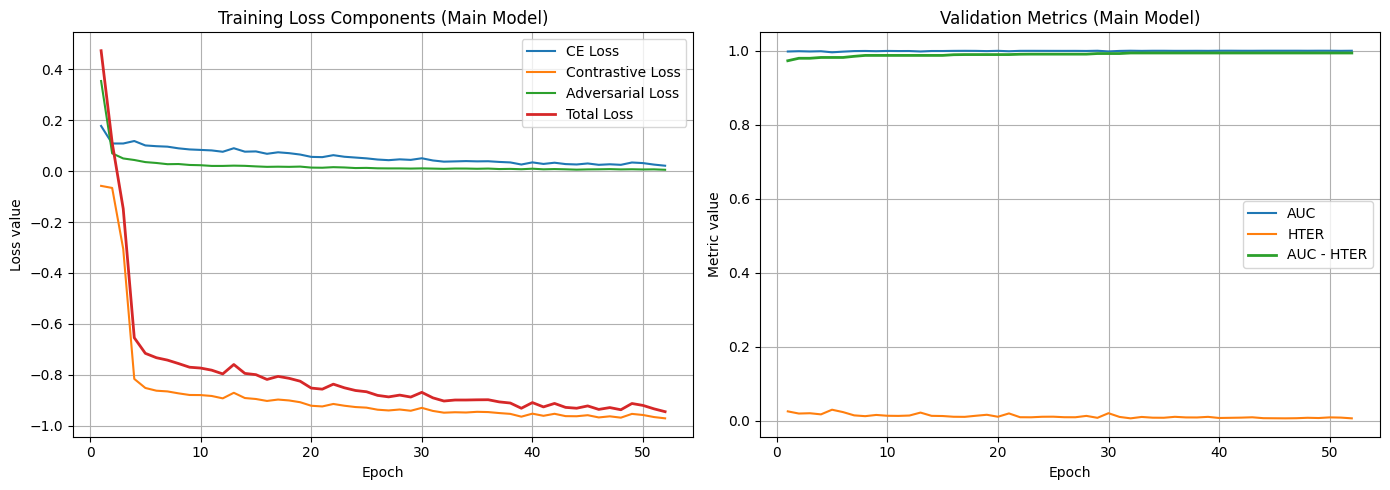

In [8]:
plt.figure(figsize=(14, 5))

# ----- Loss components -----
plt.subplot(1, 2, 1)
plt.plot(df_main["epoch"], df_main["train_ce"], label="CE Loss")
plt.plot(df_main["epoch"], df_main["train_contra"], label="Contrastive Loss")
plt.plot(df_main["epoch"], df_main["train_adv"], label="Adversarial Loss")
plt.plot(df_main["epoch"], df_main["train_total"], label="Total Loss", linewidth=2)

plt.xlabel("Epoch")
plt.ylabel("Loss value")
plt.title("Training Loss Components (Main Model)")
plt.legend()
plt.grid(True)

# ----- Validation metrics -----
plt.subplot(1, 2, 2)
plt.plot(df_main["epoch"], df_main["val_auc"], label="AUC")
plt.plot(df_main["epoch"], df_main["val_hter"], label="HTER")
plt.plot(df_main["epoch"], df_main["best_metric"], label="AUC - HTER", linewidth=2)

plt.xlabel("Epoch")
plt.ylabel("Metric value")
plt.title("Validation Metrics (Main Model)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


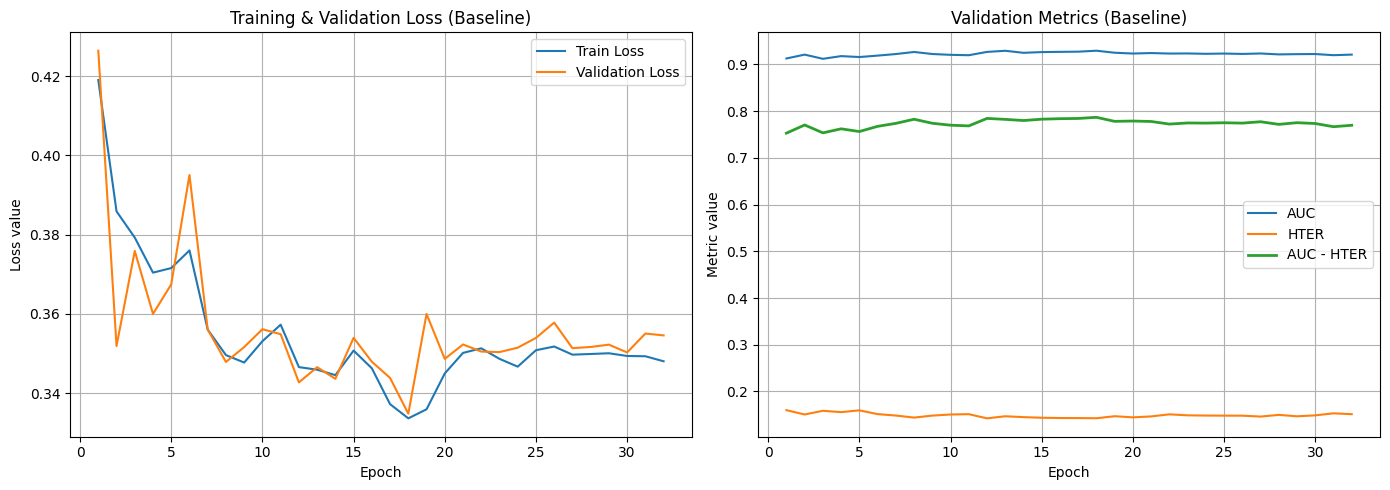

In [3]:
plt.figure(figsize=(14, 5))

# ----- Train vs Val Loss -----
plt.subplot(1, 2, 1)
plt.plot(df_base["epoch"], df_base["train_loss"], label="Train Loss")
plt.plot(df_base["epoch"], df_base["val_loss"], label="Validation Loss")

plt.xlabel("Epoch")
plt.ylabel("Loss value")
plt.title("Training & Validation Loss (Baseline)")
plt.legend()
plt.grid(True)

# ----- Validation metrics -----
plt.subplot(1, 2, 2)
plt.plot(df_base["epoch"], df_base["val_auc"], label="AUC")
plt.plot(df_base["epoch"], df_base["val_hter"], label="HTER")
plt.plot(df_base["epoch"], df_base["metric_auc_minus_hter"], label="AUC - HTER", linewidth=2)

plt.xlabel("Epoch")
plt.ylabel("Metric value")
plt.title("Validation Metrics (Baseline)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


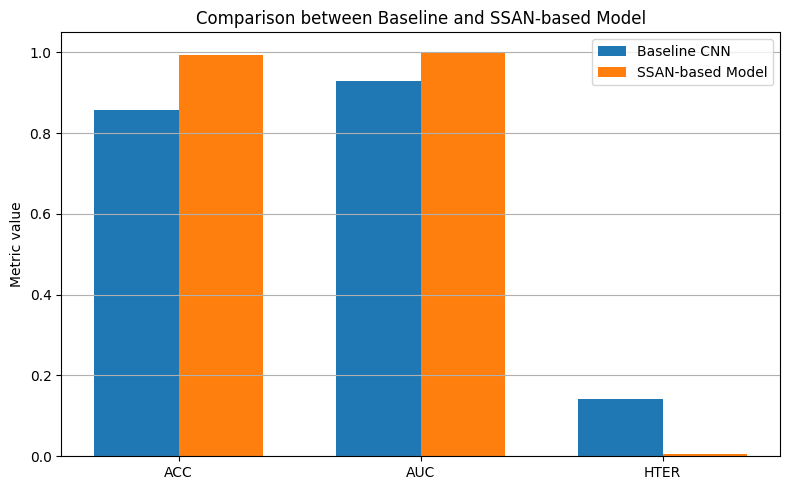

In [4]:
# Lấy best epoch của mỗi model
best_main = df_main.loc[df_main["best_metric"].idxmax()]
best_base = df_base.loc[df_base["metric_auc_minus_hter"].idxmax()]

metrics = ["val_acc", "val_auc", "val_hter"]
main_values = [best_main["val_acc"], best_main["val_auc"], best_main["val_hter"]]
base_values = [best_base["val_acc"], best_base["val_auc"], best_base["val_hter"]]

x = range(len(metrics))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x, base_values, width, label="Baseline CNN")
plt.bar([i + width for i in x], main_values, width, label="SSAN-based Model")

plt.xticks([i + width / 2 for i in x], ["ACC", "AUC", "HTER"])
plt.ylabel("Metric value")
plt.title("Comparison between Baseline and SSAN-based Model")
plt.legend()
plt.grid(axis="y")

plt.tight_layout()
plt.show()
